In [0]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [0]:
df = fetch_openml("mnist_784")

In [0]:
X, y = df['data'], df['target']

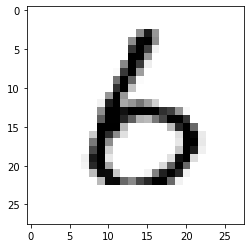

In [4]:
rand_dig = X[4800]
dig_plot = rand_dig.reshape(28,28)
plt.imshow(dig_plot, cmap=matplotlib.cm.binary, interpolation='nearest')

In [0]:
X_train, X_test = X[0:6000], X[6000:7000]
y_train, y_test = y[0:6000], y[6000:7000]

In [0]:
shuffle = np.random.permutation(6000)
X_train, y_train = X_train[shuffle], y_train[shuffle]

In [0]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train2 = (y_train==6)
y_test2 = (y_test==6)

In [17]:
y_test2

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,

In [18]:
model = LogisticRegression()
model.fit(X_train, y_train2)
y_pred = model.predict([rand_dig])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [19]:
y_pred

array([ True])

In [12]:
sc = cross_val_score(model, X_train, y_train2, cv=3, scoring="accuracy")
sc.mean()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.9851666666666666

In [13]:
model2 = svm.SVC()
model2.fit(X_train, y_train2)
model2.predict([rand_dig])

array([False])

In [15]:
sc2 = cross_val_score(model2, X_train, y_train2, cv=3, scoring="accuracy")
sc2.mean()

0.9931666666666668